In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

     \ 1.1MB 2.0MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for sklearn-extra: filename=sklearn_extra-0.0.3-cp37-cp37m-linux_x86_64.whl size=366029 sha256=30dccb96aa326d090df751c5b4c92aa3577c81091ea1274004d0ef23f46d0f2f
  Stored in directory: /tmp/pip-ephem-wheel-cache-oxjtu9gt/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built sklearn-extra


### Read dataset

In [3]:
original_dataset = pd.read_csv('data_class.csv')

### Attributes for which stats have to be shown

In [4]:
attrs = [
    'total_sales',
    'exempt_sales',
    'sgst_liability',
    'cgst_liability',
    'igst_liability',
    'total_liability',
    'sgst_cashsetoff',
    'cgst_cashsetoff',
    'igst_cashsetoff',
    'total_cashsetoff',
    'sgst_itc_claimed',
    'cgst_itc_claimed',
    'igst_itc_claimed',
    'total_itc_claimed'
]

In [5]:
original_dataset[attrs].describe()

,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
count,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04,9.831000e+04
mean,6.992708e+07,1.059383e+06,3.488678e+05,3.488360e+05,2.441649e+05,9.418687e+05,5.027718e+04,2.698632e+04,3.390614e+04,1.111696e+05,2.706259e+05,2.709869e+05,3.331935e+05,8.748064e+05
std,1.945731e+10,5.397268e+07,2.232970e+06,2.233034e+06,3.421634e+06,6.331791e+06,8.005388e+05,3.427799e+05,6.966704e+05,1.338797e+06,1.959146e+06,1.962724e+06,3.458046e+06,6.309488e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.516012e+05,0.000000e+00,8.613875e+03,8.621250e+03,0.000000e+00,2.654280e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.171680e+03,3.172370e+03,0.000000e+00,1.947850e+04
50%,5.701863e+05,0.000000e+00,3.994900e+04,3.995050e+04,0.000000e+00,1.013656e+05,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,2.773083e+04,2.770950e+04,0.000000e+00,9.208107e+04
75%,1.772633e+06,0.000000e+00,1.277275e+05,1.277275e+05,1.277892e+04,3.146498e+05,2.900000e+03,1.800000e+03,0.000000e+00,1.222500e+04,1.018048e+05,1.017630e+05,3.692975e+04,2.893800e+05
max,6.100188e+12,5.898273e+09,1.727816e+08,1.727816e+08,3.064883e+08,4.154618e+08,7.282042e+07,3.210738e+07,6.359860e+07,9.067731e+07,2.151460e+08,2.151460e+08,2.079467e+08,6.379525e+08


In [6]:
original_dataset.shape

(98310, 16)

### Drop returns with total liability 0

In [7]:
dataset = original_dataset.drop(original_dataset[original_dataset['total_liability'] == 0].index)
dataset.shape

(92025, 16)

### Drop returns with total itc claimed 0

In [8]:
dataset = dataset.drop(dataset[dataset['total_itc_claimed'] == 0].index)
dataset.shape

(85187, 16)

### Delete month and group the returns by id

In [9]:
del dataset['mnth']
dataset = dataset.groupby(['id']).mean()
dataset

,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
id,,,,,,,,,,,,,,
1,2.565797e+06,0.000000e+00,8.182866e+04,8.182866e+04,2.981861e+05,4.618434e+05,6.874514e+04,6.867514e+04,2.841309e+05,4.215511e+05,1.466838e+04,1.466838e+04,8.325857e+03,3.766261e+04
2,5.129100e+07,0.000000e+00,0.000000e+00,0.000000e+00,9.232380e+06,9.232380e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.232380e+06,9.232380e+06
4,0.000000e+00,0.000000e+00,1.485000e+03,1.485000e+03,0.000000e+00,2.970000e+03,1.485000e+03,1.485000e+03,0.000000e+00,2.970000e+03,1.485000e+03,1.485000e+03,4.587300e+04,4.884300e+04
7,1.742512e+06,0.000000e+00,1.045505e+05,1.045505e+05,0.000000e+00,2.091010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.045505e+05,1.045505e+05,0.000000e+00,2.091010e+05
8,6.026978e+07,0.000000e+00,2.176186e+06,2.176186e+06,0.000000e+00,4.352373e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.176186e+06,2.176186e+06,0.000000e+00,4.352373e+06
10,2.219681e+08,0.000000e+00,1.540722e+07,1.540722e+07,0.000000e+00,3.081445e+07,3.080195e+05,3.080195e+05,0.000000e+00,6.160390e+05,1.509920e+07,1.509920e+07,0.000000e+00,3.019841e+07
15,9.175136e+06,1.874625e+05,5.291579e+05,5.291579e+05,5.705207e+05,1.628837e+06,4.440500e+04,0.000000e+00,1.105818e+04,5.546318e+04,3.066422e+04,3.066422e+04,1.421565e+06,1.482893e+06
16,4.882195e+06,0.000000e+00,4.088768e+05,4.088768e+05,7.994633e+04,8.977000e+05,6.225000e+03,6.225000e+03,6.431500e+04,7.676500e+04,4.807677e+05,4.807677e+05,1.287913e+05,1.090327e+06
17,8.389259e+07,1.653937e+06,6.267736e+06,6.267736e+06,2.840093e+06,1.537556e+07,3.828544e+06,1.366430e+06,3.274425e+04,5.227718e+06,2.248080e+06,2.248080e+06,5.656565e+06,1.015272e+07


### Performing Benford Analysis on individual attributes

In [10]:
from math import log10

def benford_analysis(vals):
    # Expected Benford frequencies
    expected_freq = [round(len(vals) * log10(1 + 1/d)) for d in range(1, 10)]

    # Convert to scientific notation and get first digit
    first_digit = lambda x: int(('%e' % x)[0])

    # Get observed first digit frequencies
    observed_freq = [0] * 10
    for val in vals:
        observed_freq[first_digit(val)] += 1
    observed_freq = observed_freq[1:]

    print('Expected frequencies: ', expected_freq)
    print('Observed frequencies: ', observed_freq)

    mean_abs_dev = 1/(len(vals)*9) * sum([abs(obv-exp)
                                          for obv, exp in zip(observed_freq, expected_freq)])
    print('Mean absolute deviation: %.6lf' % mean_abs_dev)
    
    plt.plot(range(1, 10), expected_freq, label='Expected')
    plt.plot(range(1, 10), observed_freq, label='Observed')
    plt.legend(loc='upper right')
    plt.show()

					 TOTAL_SALES
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2834, 1524, 1142, 902, 767, 626, 567, 495, 446]
Mean absolute deviation: 0.003013


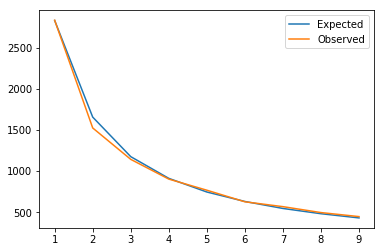



					 EXEMPT_SALES
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [264, 179, 118, 88, 68, 59, 57, 27, 52]
Mean absolute deviation: 0.100346


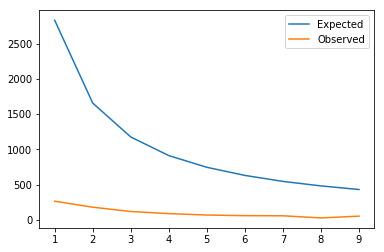



					 SGST_LIABILITY
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2794, 1583, 1153, 905, 735, 652, 564, 476, 449]
Mean absolute deviation: 0.002517


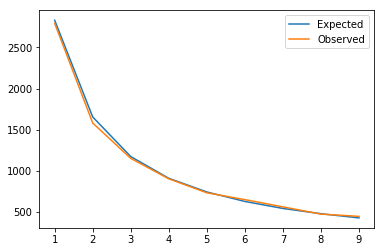



					 CGST_LIABILITY
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2794, 1582, 1153, 905, 734, 653, 564, 476, 450]
Mean absolute deviation: 0.002564


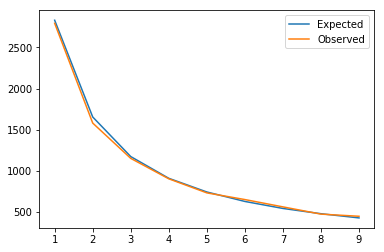



					 IGST_LIABILITY
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [1559, 917, 654, 489, 426, 353, 309, 267, 242]
Mean absolute deviation: 0.049488


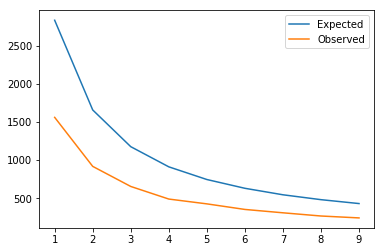



					 TOTAL_LIABILITY
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2899, 1673, 1150, 872, 716, 591, 571, 455, 476]
Mean absolute deviation: 0.003722


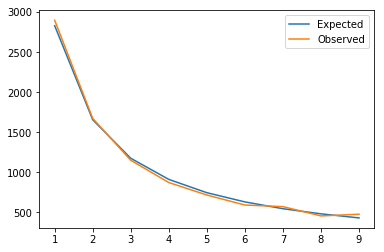



					 SGST_CASHSETOFF
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2342, 1508, 1023, 788, 640, 527, 465, 508, 377]
Mean absolute deviation: 0.015125


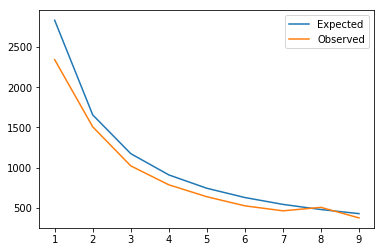



					 CGST_CASHSETOFF
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2343, 1491, 1002, 784, 648, 553, 488, 485, 369]
Mean absolute deviation: 0.014759


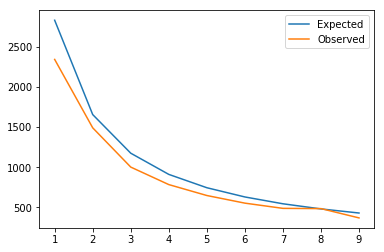



					 IGST_CASHSETOFF
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [858, 546, 357, 286, 226, 192, 161, 148, 123]
Mean absolute deviation: 0.076890


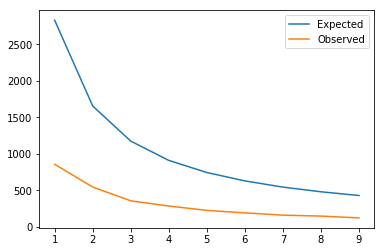



					 TOTAL_CASHSETOFF
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2607, 1429, 976, 851, 692, 602, 491, 422, 338]
Mean absolute deviation: 0.011769


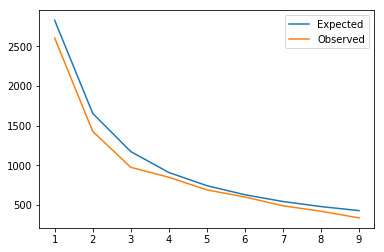



					 SGST_ITC_CLAIMED
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2759, 1526, 1137, 882, 745, 647, 538, 517, 462]
Mean absolute deviation: 0.004266


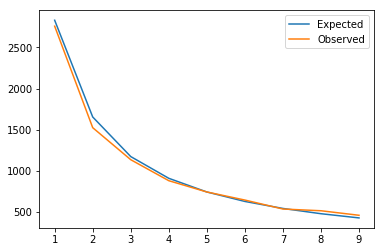



					 CGST_ITC_CLAIMED
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2757, 1522, 1141, 882, 745, 648, 540, 521, 460]
Mean absolute deviation: 0.004301


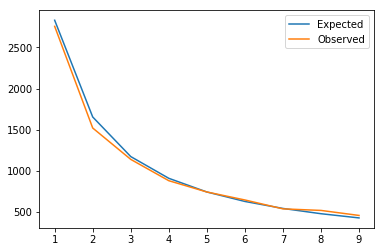



					 IGST_ITC_CLAIMED
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [1797, 1092, 746, 543, 481, 374, 354, 296, 277]
Mean absolute deviation: 0.040696


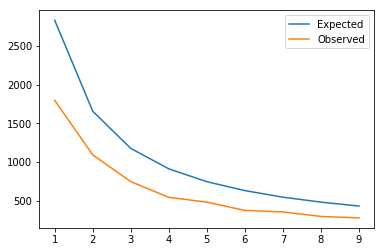



					 TOTAL_ITC_CLAIMED
Expected frequencies:  [2831, 1656, 1175, 911, 745, 630, 545, 481, 430]
Observed frequencies:  [2912, 1712, 1099, 923, 727, 596, 540, 464, 430]
Mean absolute deviation: 0.003533


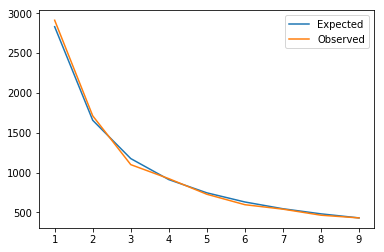

In [11]:
for attr in attrs:
    print('\t\t\t\t\t', attr.upper())
    benford_analysis(dataset[attr])
    print('\n')

### Getting the derived parameters

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

**Lists of correlation, ratio parameters to derive**

In [13]:
correlation_parameter_pairs = [
    ('total_sales', 'total_liability'),
    ('total_liability', 'sgst_liability'),
    ('sgst_liability', 'sgst_cashsetoff'),
    ('total_sales', 'sgst_cashsetoff'),
    ('total_liability', 'total_itc_claimed'),
    ('total_itc_claimed', 'igst_itc_claimed')
]

ratio_parameter_pairs = [
    ('igst_itc_claimed', 'total_itc_claimed'),
    ('igst_itc_claimed', 'total_liability')
]

**Derive correlation params**

In [14]:
linear_reg_models = []
for variable_1, variable_2 in correlation_parameter_pairs:
    X = np.array(dataset[variable_1]).reshape(-1, 1)
    Y = np.array(dataset[variable_2])
    linear_reg_models.append(
        LinearRegression().fit(X, Y)
    )

In [15]:
def dist(linear_reg_model, x, y, dist_type='error_dist'):
    """Function to get distance from linear regression separating line"""
    if dist_type == 'error_dist':
        # abs(Prediction - True value)
        return abs((linear_reg_model.coef_[0]*x + linear_reg_model.intercept_) - y)
    
    if dist_type == 'min_dist':
        # minimum distance from the regression line
        return (
            abs(linear_reg_model.coef_[0]*x - y + linear_reg_model.intercept_)
            / (linear_reg_model.coef_[0]**2 + 1)**0.5
        )
    
    raise NotImplementedError('Invalid dist_type')

**Columns in the modified dataset**

In [16]:
cols = [
    'correlation_1',
    'correlation_2',
    'correlation_3',
    'correlation_4',
    'correlation_5',
    'correlation_6',
    'ratio_1',
    'ratio_2'
]

In [17]:
modified_dataset = []
for data in dataset.values:
    # Put id and month without modification
    modified_data = []
    
    # Generating correlation params
    for i, (var1, var2) in enumerate(correlation_parameter_pairs):
        x = data[list(dataset.columns).index(var1)]
        y = data[list(dataset.columns).index(var2)]
        modified_data.append(
            dist(linear_reg_models[i], x, y, dist_type='error_dist')
        )
    
    # Generating ratio params
    for var1, var2 in ratio_parameter_pairs:
        x = data[list(dataset.columns).index(var1)]
        y = data[list(dataset.columns).index(var2)]
        modified_data.append(x/y)

    modified_dataset.append(modified_data)

In [18]:
modified_dataset = pd.DataFrame(
    data=modified_dataset,
    index=dataset.index,
    columns=cols
)

In [19]:
modified_dataset.describe()

,correlation_1,correlation_2,correlation_3,correlation_4,correlation_5,correlation_6,ratio_1,ratio_2
count,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9403.000000,9403.000000
mean,1.340572e+06,1.864145e+05,6.721399e+04,8.032557e+04,1.817390e+05,2.591939e+05,0.239194,4.983042
std,5.337196e+06,9.841838e+05,5.013731e+05,6.025994e+05,1.286122e+06,1.461778e+06,0.325430,425.112335
min,1.169777e+02,1.850649e-01,3.124967e+00,1.207235e+02,1.270757e+01,1.741573e+01,0.000000,0.000000
25%,6.846721e+05,5.197943e+04,7.777415e+03,4.302924e+04,1.166585e+04,4.522676e+04,0.000000,0.000000
50%,8.279814e+05,7.095939e+04,1.220433e+04,4.922327e+04,2.567464e+04,6.995646e+04,0.045916,0.037128
75%,8.940921e+05,8.038917e+04,2.247521e+04,4.984478e+04,6.573035e+04,1.029655e+05,0.416656,0.367592
max,2.237888e+08,3.545772e+07,3.406976e+07,4.443804e+07,4.723933e+07,6.308538e+07,1.000000,41205.118182


**Normalize the dataset columns**

In [20]:
for col in cols:
    modified_dataset[col] -= modified_dataset[col].mean()
    modified_dataset[col] /= modified_dataset[col].std()

In [21]:
modified_dataset.describe()

,correlation_1,correlation_2,correlation_3,correlation_4,correlation_5,correlation_6,ratio_1,ratio_2
count,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03,9.403000e+03
mean,4.217280e-16,-2.209229e-16,1.033987e-15,2.975201e-16,-1.604587e-17,3.292562e-16,1.371514e-16,3.901779e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.511534e-01,-1.894101e-01,-1.340536e-01,-1.330981e-01,-1.412978e-01,-1.773023e-01,-7.350074e-01,-1.172171e-02
25%,-1.228923e-01,-1.365955e-01,-1.185476e-01,-6.189241e-02,-1.322371e-01,-1.463746e-01,-7.350074e-01,-1.172171e-02
50%,-9.604119e-02,-1.173106e-01,-1.097180e-01,-5.161355e-02,-1.213449e-01,-1.294571e-01,-5.939147e-01,-1.163437e-02
75%,-8.365442e-02,-1.077292e-01,-8.923252e-02,-5.058216e-02,-9.020032e-02,-1.068756e-01,5.453171e-01,-1.085701e-02
max,4.167885e+01,3.583812e+01,6.781884e+01,7.361061e+01,3.658874e+01,4.297931e+01,2.337848e+00,9.691588e+01


In [22]:
id_map = dict()
for k, v in enumerate(modified_dataset.index):
    id_map[k] = v

In [23]:
id_map

{0: 1,
 1: 2,
 2: 4,
 3: 7,
 4: 8,
 5: 10,
 6: 15,
 7: 16,
 8: 17,
 9: 18,
 10: 20,
 11: 21,
 12: 22,
 13: 23,
 14: 24,
 15: 25,
 16: 27,
 17: 28,
 18: 29,
 19: 30,
 20: 31,
 21: 32,
 22: 33,
 23: 35,
 24: 36,
 25: 37,
 26: 38,
 27: 39,
 28: 40,
 29: 41,
 30: 42,
 31: 44,
 32: 45,
 33: 46,
 34: 47,
 35: 48,
 36: 49,
 37: 50,
 38: 52,
 39: 53,
 40: 54,
 41: 55,
 42: 57,
 43: 58,
 44: 59,
 45: 61,
 46: 62,
 47: 64,
 48: 65,
 49: 66,
 50: 67,
 51: 68,
 52: 69,
 53: 70,
 54: 71,
 55: 72,
 56: 73,
 57: 74,
 58: 75,
 59: 76,
 60: 77,
 61: 78,
 62: 79,
 63: 80,
 64: 81,
 65: 82,
 66: 83,
 67: 85,
 68: 86,
 69: 88,
 70: 89,
 71: 90,
 72: 92,
 73: 93,
 74: 94,
 75: 95,
 76: 96,
 77: 99,
 78: 100,
 79: 101,
 80: 102,
 81: 103,
 82: 104,
 83: 105,
 84: 106,
 85: 107,
 86: 108,
 87: 111,
 88: 113,
 89: 114,
 90: 116,
 91: 117,
 92: 118,
 93: 119,
 94: 120,
 95: 122,
 96: 123,
 97: 124,
 98: 125,
 99: 126,
 100: 127,
 101: 128,
 102: 129,
 103: 130,
 104: 131,
 105: 132,
 106: 133,
 107: 134,
 108:

**Function to get all the filed return of specific group of people**

In [24]:
def get_all_filed_returns(indices):
    return original_dataset[original_dataset['id'].isin(indices)]

**Function to perform benford analysis on the clusters formed**

In [25]:
def benford_analysis_on_cluster(cluster):
    df = get_all_filed_returns(cluster)
    THRESHOLD = 1000
    if len(df) < THRESHOLD:
        print('Too few points to perform Benford Analysis. Number of points: %d' % len(df))
        return
    
    for attr in attrs:
        print('\t\t\t\t\t', attr.upper())
        benford_analysis(df[attr])
        print('\n')

**Function to get outliers in a given cluster**

In [26]:
def get_outliers(cluster, percent=5):
    try:
        cnt = round(len(cluster) * percent/100)
        center = modified_dataset.loc[cluster].mean()

        return sorted(
            cluster,
            key=lambda idx: sum(modified_dataset.loc[idx] - center)**2,
            reverse=True
        )[:cnt]
    
    except KeyError as ke:
        print('Invalid index requested!')
        print(ke)
        return

**Function to get the individual clusters, given the coloring of nodes**

In [27]:
def get_clusters(labels):
    clusters = []
    for label in set(labels):
        clusters.append(
            [id_map[i] for i in (labels == label).nonzero()[0]]
        )
    return clusters

**Function to get outliers from all clusters given labels**

In [75]:
def get_overall_outliers(labels, percent=5):
    all_outliers = []
    clusters = get_clusters(labels)
    for cluster in clusters:
        outliers = get_outliers(cluster, percent=percent)
        if len(outliers) == 0:
            all_outliers += cluster
            print(cluster)
            continue
        all_outliers += outliers
    return all_outliers

In [105]:
votes = np.zeros(max(original_dataset['id']) + 1, dtype=int)

In [93]:
get_all_filed_returns(outliers)

,id,mnth,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
27,8,22018,5.804434e+07,0.0,3482660.00,3482660.00,0.00,6965320.00,0.0,0.0,0.0,0.0,3482660.00,3482660.00,0.00,6965320.00
28,8,82017,0.000000e+00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
29,8,102017,2.936408e+07,0.0,1761845.00,1761845.00,0.00,3523690.00,0.0,0.0,0.0,0.0,1761845.00,1761845.00,0.00,3523690.00
30,8,62018,2.371425e+07,0.0,1422855.00,1422855.00,0.00,2845710.00,0.0,0.0,0.0,0.0,1422855.00,1422855.00,0.00,2845710.00
31,8,32018,5.602354e+07,0.0,3361412.00,3361412.00,0.00,6722824.00,0.0,0.0,0.0,0.0,3361412.00,3361412.00,0.00,6722824.00
32,8,122017,3.389154e+07,0.0,2033492.00,2033492.00,0.00,4066984.00,0.0,0.0,0.0,0.0,2033492.00,2033492.00,0.00,4066984.00
33,8,92017,1.605809e+08,0.0,994855.00,994855.00,0.00,1989710.00,0.0,0.0,0.0,0.0,994855.00,994855.00,0.00,1989710.00
77,17,32018,8.671143e+07,1891248.0,6300793.82,6300793.82,2861940.76,15463528.40,92993.0,92993.0,9914.0,195900.0,5864708.86,5864708.86,6094117.88,17823535.60
78,17,62018,8.540400e+07,2932662.0,6072584.16,6072584.16,2945252.03,15090420.35,3975371.0,326019.0,27259.0,4328649.0,2097213.01,2097213.01,6567377.67,10761803.69
79,17,92017,9.950209e+07,2015231.0,7902238.02,7902238.02,3185248.58,18989724.62,4721444.0,2088634.0,66232.0,6876310.0,3180794.43,3180794.43,5751827.07,12113415.93


**DBSCAN**

In [29]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(
    eps=10,
    min_samples=2,
    metric='euclidean'
).fit(modified_dataset)

print(list(dbscan.labels_).count(-1))
get_clusters(dbscan.labels_)

13


[[1,
  2,
  4,
  7,
  8,
  10,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  52,
  53,
  54,
  55,
  57,
  58,
  59,
  61,
  62,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  85,
  86,
  88,
  89,
  90,
  92,
  93,
  95,
  96,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  111,
  113,
  114,
  116,
  117,
  118,
  119,
  120,
  122,
  123,
  124,
  125,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  158,
  159,
  160,
  163,
  164,
  165,
  166,
  167,
  168,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  186,
  187,
  188,
  190,
  19

**K-MEANS**

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(modified_dataset)

In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(modified_dataset, kmeans.labels_, metric='euclidean')

0.713842501785264

In [106]:
outliers = get_overall_outliers(kmeans.labels_)
votes[outliers] += 1

[1344]
[162]
[126, 161, 352, 663, 841, 3079, 4359]
[94, 111, 184, 578, 610, 2008, 2012]
[287, 370, 926, 1019, 2512]


**K-MEDOIDS**

In [31]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=10, random_state=0).fit(modified_dataset)

In [42]:
silhouette_score(modified_dataset, kmedoids.labels_, metric='euclidean')

0.3106211644400505

In [107]:
outliers = get_overall_outliers(kmedoids.labels_)
votes[outliers] += 1

**HIERARCHICAL CLUSTERING**

In [86]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=2).fit(modified_dataset)
np.bincount(hierarchical.labels_)

array([9370,   33])

In [87]:
silhouette_score(modified_dataset, hierarchical.labels_, metric='euclidean')

0.9538218286500272

In [108]:
outliers = get_overall_outliers(hierarchical.labels_)
votes[outliers] += 1

In [91]:
get_all_filed_returns(outliers)

,id,mnth,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
10,2,92017,0.000000e+00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
11,2,22018,5.129100e+07,0.0,0.00,0.00,9232379.82,9232379.82,0.0,0.0,0.0,0.0,0.00,0.00,9232379.82,9232379.82
12,2,82017,0.000000e+00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
13,2,72017,0.000000e+00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
14,2,102017,0.000000e+00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
27,8,22018,5.804434e+07,0.0,3482660.00,3482660.00,0.00,6965320.00,0.0,0.0,0.0,0.0,3482660.00,3482660.00,0.00,6965320.00
28,8,82017,0.000000e+00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
29,8,102017,2.936408e+07,0.0,1761845.00,1761845.00,0.00,3523690.00,0.0,0.0,0.0,0.0,1761845.00,1761845.00,0.00,3523690.00
30,8,62018,2.371425e+07,0.0,1422855.00,1422855.00,0.00,2845710.00,0.0,0.0,0.0,0.0,1422855.00,1422855.00,0.00,2845710.00
31,8,32018,5.602354e+07,0.0,3361412.00,3361412.00,0.00,6722824.00,0.0,0.0,0.0,0.0,3361412.00,3361412.00,0.00,6722824.00


In [51]:
silhouette_score(modified_dataset, [0]*(modified_dataset.shape[0]//2) + [1]*((modified_dataset.shape[0]+1)//2), 
                 metric='euclidean')

0.026324955017691498

**SPECTRAL CLUSTERING**

In [83]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(
    n_clusters=100,
    assign_labels='discretize',
    random_state=0,
    affinity='nearest_neighbors'
).fit(modified_dataset)

In [84]:
silhouette_score(modified_dataset, spectral.labels_, metric='euclidean')

0.09298183331823791

In [109]:
outliers = get_overall_outliers(kmeans.labels_)
votes[outliers] += 1

[1344]
[162]
[126, 161, 352, 663, 841, 3079, 4359]
[94, 111, 184, 578, 610, 2008, 2012]
[287, 370, 926, 1019, 2512]


In [35]:
len(outliers)

187

In [37]:
val = get_all_filed_returns(outliers)
val[val['exempt_sales'] > 0].groupby('id').mean().shape

(28, 15)

In [38]:
val = get_all_filed_returns([9 ,16 ,17 ,19 ,23 ,28 ,36 ,40 ,68 ,75 ,78 ,79 ,81 ,85 ,88 ,93, 102])
val[val['exempt_sales'] > 0]

,id,mnth,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
77,17,32018,8.671143e+07,1891248.0,6300793.82,6300793.82,2861940.76,15463528.40,92993.0,92993.0,9914.0,195900.0,5864708.86,5864708.86,6094117.88,17823535.60
78,17,62018,8.540400e+07,2932662.0,6072584.16,6072584.16,2945252.03,15090420.35,3975371.0,326019.0,27259.0,4328649.0,2097213.01,2097213.01,6567377.67,10761803.69
79,17,92017,9.950209e+07,2015231.0,7902238.02,7902238.02,3185248.58,18989724.62,4721444.0,2088634.0,66232.0,6876310.0,3180794.43,3180794.43,5751827.07,12113415.93
80,17,22018,7.243839e+07,1449444.0,5283769.19,5283769.19,2547327.63,13114866.01,3745309.0,678774.0,20911.0,4444994.0,1538460.36,1538460.36,5593473.84,8670394.56
81,17,122017,7.862225e+07,1046621.0,5934374.08,5934374.08,2411625.99,14280374.15,3915135.0,1178656.0,23960.0,5117751.0,2019239.46,2019239.46,5124144.66,9162623.58
82,17,82017,8.619195e+07,820388.0,6829378.09,6829378.09,2800747.75,16459503.93,5185837.0,2764378.0,61355.0,8011570.0,1643541.25,1643541.25,5160852.33,8447934.83
83,17,42018,7.620482e+07,1652034.0,5540749.08,5540749.08,2922822.65,14004320.81,2452111.0,269995.0,44833.0,2766939.0,1138386.99,1138386.99,6404701.09,8681475.07
84,17,102017,9.254925e+07,1277934.0,7261754.81,7261754.81,3360978.71,17884488.33,4365258.0,2096200.0,88931.0,6550389.0,2896496.83,2896496.83,5541105.03,11334098.69
85,17,12018,8.278892e+07,1439742.0,6024819.54,6024819.54,2904955.94,14954595.02,4017445.0,1626873.0,26273.0,5670591.0,2007374.29,2007374.29,5269254.87,9284003.45
86,17,72017,8.139276e+07,1169902.0,6356760.00,6356760.00,2196140.00,14909660.00,5873453.0,3156024.0,0.0,9029477.0,483307.00,483307.00,4913569.00,5880183.00


In [110]:
np.bincount(votes)

array([10125,   560,   286,   134,    97])

In [118]:
(votes == 0).nonzero()[:10]

(array([    0,     3,     4, ..., 11199, 11200, 11201]),)

In [120]:
get_all_filed_returns((votes == 1).nonzero()[0][:10])

,id,mnth,total_sales,exempt_sales,sgst_liability,cgst_liability,igst_liability,total_liability,sgst_cashsetoff,cgst_cashsetoff,igst_cashsetoff,total_cashsetoff,sgst_itc_claimed,cgst_itc_claimed,igst_itc_claimed,total_itc_claimed
0,1,32018,4.619186e+06,0.0,148115.79,148115.79,535221.90,831453.48,136292.0,136292.0,509159.00,781743.00,11823.75,11823.75,26062.80,49710.30
1,1,52018,1.947043e+06,0.0,81309.98,81309.98,187847.82,350467.78,60506.0,60506.0,187038.00,308050.00,20803.89,20803.89,810.00,42417.78
2,1,12018,1.452682e+06,0.0,10163.37,10163.37,241155.97,261482.71,0.0,0.0,208842.00,208842.00,19151.77,19151.77,14335.74,52639.28
3,1,92017,6.743790e+05,0.0,3240.00,3240.00,114908.22,121388.22,3240.0,3240.0,114908.00,121388.00,0.00,0.00,0.00,0.00
4,1,102017,1.041797e+06,0.0,64706.22,64706.22,58111.02,187523.46,64706.0,64706.0,58111.00,187523.00,0.00,0.00,0.00,0.00
5,1,62018,2.782151e+06,0.0,109873.31,109873.31,281040.48,500787.10,97198.0,97198.0,272353.00,466749.00,12675.10,12675.10,8686.55,34036.75
6,1,82017,5.736150e+05,0.0,0.00,0.00,103250.70,103250.70,0.0,0.0,103251.00,103251.00,0.00,0.00,0.00,0.00
7,1,22018,4.098529e+06,0.0,179982.59,179982.59,377770.14,737735.32,148158.0,148158.0,376613.00,672929.00,31825.24,31825.24,1156.50,64806.98
8,1,122017,2.579256e+06,0.0,0.00,0.00,464266.08,464266.08,0.0,0.0,434911.00,434911.00,2104.96,2104.96,6739.41,10949.33
9,1,42018,4.817287e+05,0.0,43355.58,43355.58,0.00,86711.16,39062.0,38572.0,0.00,77634.00,4293.94,4293.94,490.00,9077.88
